# 1: create an aligned parallel corpus

For each source token, take two decisions with a BERT-like model:
1. Whether to keep, delete, or replace it with some other token. 
2. Whether to insert some other token after it.

### Load the parallel text

In [2]:
import pandas as pd

In [3]:
df_orig = pd.read_csv('../data/spellchecker_dataset_split.tsv', sep='\t')
df_orig

,trash,clean,trash2,clean2,distance,normalized_distance,split,edit_max_cldiff,edit_max_lendiff
0,"Шунда ук әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда уҡ әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда ук әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда уҡ әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...",1,0.015385,train,1,0
1,Унан беҙ өсөбөҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ әсәбеҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ өсөбөҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ әсәбеҙ ҙә ултырғыстарға ултырабыҙ.,3,0.069767,test,1,0
2,"«Иҫән-Һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-Һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-һау ғына тороғоҙ инде», - тип бышылдай у...",1,0.014085,dev,1,0
3,"Минең генә бер кешем дә юҡ, тип шунда уҡ танау...","Минең генә бер кешем дә юҡ, - тип шунда уҡ тан...","Минең генә бер кешем дә юҡ, тип шунда уҡ танау...","Минең генә бер кешем дә юҡ, - тип шунда уҡ тан...",2,0.029412,train,0,0
4,"Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...",1,0.012500,train,1,0
...,...,...,...,...,...,...,...,...,...
23886,"Эҫтәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эстәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эҫтәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эстәрендә бүре үк оломаһа ла, эттәр шыңшый баш...",1,0.020000,dev,1,0
23887,Үткән йәйҙә яман томра көндө Кәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Ҡәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Кәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Ҡәҙерғол төбәгенд...,1,0.009524,train,1,0
23888,"Кайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Ҡайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Кайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Ҡайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...",1,0.020000,train,1,0
23889,Кыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Ҡыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Кыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Ҡыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,1,0.009174,train,1,0


In [4]:
df_orig_train = df_orig[(df_orig.split=='train')]
print(df_orig_train.shape)

df_orig_train = df_orig_train[df_orig_train.edit_max_cldiff <= 3]
print(df_orig_train.shape)
df_orig_train = df_orig_train[df_orig_train.edit_max_lendiff <= 1].copy()
print(df_orig_train.shape)

(14382, 9)
(14171, 9)
(14085, 9)


In [5]:
df_orig_dev = df_orig[(df_orig.split=='dev') & (df_orig.edit_max_cldiff <= 3) & (df_orig.edit_max_lendiff <= 1)]
print(df_orig_dev.shape)

(4611, 9)


In [436]:
dev_small = df_orig_dev.sample(100, random_state=1).copy()

## Load the clean texts

In [104]:
import os
from tqdm.auto import tqdm, trange

In [105]:
clean_texts = []

In [106]:
path = '../../bashkir-corpus/public_domain'
for fname in os.listdir(path):
    if fname.endswith('.txt'):
        with open(path + '/' + fname, 'r') as f:
            clean_texts.append(f.read())

In [107]:
path = '../../bashkir-corpus/shuffled_texts'
for dirname in tqdm(os.listdir(path)):
    path1 = path + '/' + dirname
    for fname in tqdm(os.listdir(path1)):
        if fname.endswith('.txt'):
            with open(path1 + '/' + fname, 'r') as f:
                clean_texts.append(f.read())

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/735 [00:00<?, ?it/s]

  0%|          | 0/31056 [00:00<?, ?it/s]

  0%|          | 0/1409 [00:00<?, ?it/s]

  0%|          | 0/6306 [00:00<?, ?it/s]

  0%|          | 0/1743 [00:00<?, ?it/s]

  0%|          | 0/1970 [00:00<?, ?it/s]

  0%|          | 0/1886 [00:00<?, ?it/s]

  0%|          | 0/2002 [00:00<?, ?it/s]

In [108]:
print(len(clean_texts))

47112


In [109]:
import razdel

In [110]:
clean_sents = [sent.text for text in tqdm(clean_texts) for sent in razdel.sentenize(text)]
print(len(clean_sents))

  0%|          | 0/47112 [00:00<?, ?it/s]

1668613


In [164]:
import random

In [627]:
cs2 = sorted({s for s in clean_sents if len(s) > 0})
random.seed(1)
random.shuffle(cs2)
print(len(cs2))

1605495


In [628]:
with open('../data/clean_bk_sents.txt', 'w') as f:
    for sent in tqdm(cs2):
        print(sent.replace('\n', ' '), file=f)

  0%|          | 0/1605495 [00:00<?, ?it/s]

## Create a diff vocabulary

In [6]:
import difflib

In [72]:
row = df_orig.sample(1).iloc[0]
print(row.trash2)
print(row.clean2)

Борсолма, өйөңә бер ни булмаҫ,- тип көлдө иполлино.
Борсолма, өйөңә бер ни булмаҫ, - тип көлдө иполлино.


In [73]:
def get_aligned_diff(text1, text2, verbose=False):
    """ Get a list of (old,new) segments """
    edits = []
    last_edit = ' '  # space, - or +
    for item in difflib.ndiff(text1, text2):
        diff_type, char = item[0], item[2]
        if verbose:
            print(item)
        if diff_type != ' ':
            if last_edit == ' ':
                edits.append(['', ''])
            if diff_type == '-':
                edits[-1][0] = edits[-1][0] + char
            elif diff_type == '+':
                edits[-1][1] = edits[-1][1] + char
        else:
            if last_edit != ' ' or len(edits) == 0:
                edits.append(['', ''])
            edits[-1][0] = edits[-1][0] + char
            edits[-1][1] = edits[-1][1] + char
        last_edit = diff_type
    return [tuple(t) for t in edits]

In [74]:
get_aligned(row.trash2, row.clean2, verbose=False)

[('Борсолма, өйөңә бер ни булмаҫ,', 'Борсолма, өйөңә бер ни булмаҫ,'),
 ('', ' '),
 ('- тип көлдө иполлино.', '- тип көлдө иполлино.')]

In [90]:
from tqdm.auto import tqdm, trange
from collections import Counter

In [84]:
adiffs_train = [
    get_aligned_diff(row.trash2, row.clean2) 
    for i, row in tqdm(df_orig_train.iterrows(), total=df_orig_train.shape[0])
]

  0%|          | 0/14085 [00:00<?, ?it/s]

In [91]:
edits_cnt = Counter((x, y) for obs in adiffs_train for x, y in obs if x!=y)

In [172]:
print(sum(edits_cnt.values()), '\t total edits')
print(sum(c for (x, y), c in edits_cnt.items() if x == ''), '\t insertions')
print(sum(c for (x, y), c in edits_cnt.items() if y == ''), '\t deletions')
print(sum(c for (x, y), c in edits_cnt.items() if len(y) == len(x)), '\t same-length subs')
print(sum(c for (x, y), c in edits_cnt.items() if len(y) > 2 * len(x) + 1), '\t insert more than x2 source')

13668 	 total edits
4086 	 insertions
2484 	 deletions
6544 	 same-length subs
1198 	 insert more than x2 source


In [173]:
edits_cnt.most_common(20)

[(('', ' '), 1411),
 (('', '-'), 1273),
 ((' ', ''), 781),
 (('', '- '), 628),
 (('г', 'ғ'), 565),
 (('К', 'Ҡ'), 559),
 (('һ', 'Һ'), 543),
 (('', ' -'), 405),
 (('ә', 'а'), 359),
 (('е', 'ы'), 355),
 (('ә', 'э'), 255),
 (('ә', 'ө'), 233),
 (('*', ''), 212),
 (('Ь', 'Һ'), 185),
 ((',', ''), 184),
 (('ю', 'йү'), 178),
 (('.', ''), 170),
 (('-', ''), 154),
 (('Һ', 'һ'), 131),
 (('', ' - '), 126)]

Special cases of very long insertions are mostly about inserting space and hyphen, so we could just add special character items for this. 

In [178]:
for (x, y), v in edits_cnt.most_common(500):
    if len(y) > len(x) * 2 + 1:
        print((x, y), v)

('', '- ') 628
('', ' -') 405
('', ' - ') 126
('', '..') 5
('', ' 1 .') 4
('', ' .') 4
('', ', ') 2
('', ' 9.') 2
('', ' 14.') 2
('', ' 4.') 2
('', ' 1.') 2
('', ' * *') 1
('', '- ә') 1
('', ' 9') 1
('', 'V - ') 1


In [174]:
edit_g1_cnt = Counter((x, y) for obs in adiffs_train for x, y in obs if x!=y and len(y) > 1)
len(edit_g1_cnt)

223

most of non-trivial RHSs are decomposable, so I won't treat them specially

In [137]:
edit_g1_cnt.most_common(20)

[(('', '- '), 628),
 (('', ' -'), 405),
 (('ю', 'йү'), 178),
 (('', ' - '), 126),
 (('гә', 'ға'), 70),
 (('ге', 'ғы'), 28),
 (('нд', 'ңл'), 24),
 (('кә', 'ҡа'), 22),
 (('пгк', 'шҡ'), 17),
 (('ып', 'ьш'), 14),
 (('пгг', 'шт'), 12),
 (('ын', 'ьш'), 10),
 (('Ю', 'Йү'), 7),
 (('ьш', 'ын'), 6),
 (('һ', '- Һ'), 6),
 (('ьщ', 'ың'), 5),
 (('', '..'), 5),
 (('әге', 'ағы'), 5),
 (('', ' 1 .'), 4),
 (('', ' .'), 4)]

In [124]:
chars_cnt_parallel = Counter(c for sent in tqdm(df_orig_train.clean2) for c in sent)

  0%|          | 0/14085 [00:00<?, ?it/s]

In [138]:
chars_cnt_parallel.most_common(20)

[(' ', 195374),
 ('а', 122416),
 ('н', 80751),
 ('ы', 77311),
 ('ә', 76578),
 ('е', 75455),
 ('р', 66993),
 ('т', 64966),
 ('л', 64572),
 ('и', 39619),
 ('м', 32305),
 ('ҡ', 32168),
 ('у', 31421),
 ('к', 31053),
 ('й', 28947),
 ('ҙ', 28346),
 ('б', 27985),
 (',', 24804),
 ('о', 23341),
 ('с', 22126)]

In [112]:
chars_cnt = Counter(c for sent in tqdm(clean_sents) for c in sent)

  0%|          | 0/1668613 [00:00<?, ?it/s]

In [506]:
all_chars = list(chars_cnt.keys())

In [113]:
len(chars_cnt)

355

In [131]:
main_chars = ''.join(c for c, n in chars_cnt.most_common() if n >= 100) + ''.join(c for c, n in chars_cnt_parallel.most_common() if n >= 3)
main_chars = ''.join(sorted(set(main_chars + main_chars.upper() + main_chars.lower())))
print(len(main_chars))

206


In [132]:
main_chars

'\t\n !"#%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz{}\xa0«¬\xad»ÀàƏəЁЄЅЋЌАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяёєѕћќѲѳҒғҘҙҠҡҢңҪҫҮүҺһӘәӨө–—’“”•…№∂−\uf0ab\uf0bb'

In [244]:
import typing as tp


class BaseParallelizer:
    
    @property
    def labels(self) -> tp.List[str]:
        """ Get the ordered set of labels """
        pass
    
    def parallelize(self, text1: str, text2: str) -> tp.Tuple[tp.List[str], tp.List[tp.List[str]]]:
        """ Convert source and target text into list of source tokens and list of lists of target labels """
        pass
    
    def preprocess(self, text: str) -> tp.List[str]:
        """ Preprocess and tokenize the source text """
        pass
    
    def postprocess(self, text: tp.List[str], labels: tp.List[tp.List[str]]) -> str:
        """ Given a preprocessed text and predicted labels, create the final text"""
        pass
    
    def check_consistency(self, text1, text2):
        tokens1, labels = self.parallelize(text1, text2)
        tokens2 = self.preprocess(text1)
        assert tokens1 == tokens2
        recovered = self.postprocess(tokens1, labels)
        assert text2 == recovered

In [486]:
class LevenshteinParallelizer(BaseParallelizer):
    LABEL_KEEP = 'KEEP'
    LABEL_DELETE = 'DELETE'
    LABEL_PASS = 'PASS'
    
    SPECIAL_LABELS_THIS = [LABEL_KEEP, LABEL_DELETE]
    SPECIAL_LABELS_NEXT = [LABEL_PASS]
    
    @property
    def labels(self) -> tp.List[str]:
        """ Get the ordered set of labels """
        return self.labels_this + self.labels_next
    
    def __init__(self, chars, special_insertions):
        self.chars = list(chars)
        self.special_insertions = special_insertions
        
        self.labels_this = self.SPECIAL_LABELS_THIS + self.chars + self.special_insertions
        self.labels_next = self.SPECIAL_LABELS_NEXT + self.chars + self.special_insertions
        
        self.id2label_this = {label: i for i, label in enumerate(self.labels_this)}
        self.id2label_next = {label: i for i, label in enumerate(self.labels_next)}

    def parallelize(self, text1: str, text2: str) -> tp.Tuple[tp.List[str], tp.List[tp.List[str]]]:
        xs = [' ']
        y1s = [self.LABEL_DELETE] # this token
        y2s = [self.LABEL_PASS] # next token to be inserted
        for xx, yy in get_aligned_diff(text1, text2):
            if xx == yy:  # no edit
                for c in xx:
                    xs.append(c)
                    y1s.append(self.LABEL_KEEP)
                    y2s.append(self.LABEL_PASS)
            else: # there is some edit
                x_len, y_len = len(xx), len(yy)
                if yy in self.special_insertions and y_len > x_len:
                    if xx: # replace the first character
                        xs.extend(list(xx))
                        y1s.extend([yy] + [self.LABEL_DELETE] * (x_len-1))
                        y2s.extend([self.LABEL_PASS] * x_len)
                    else:
                        # insert after the previous character
                        y2s[-1] = yy
                elif y_len <= x_len:  # deletions or simple replacements
                    xs.extend(list(xx))
                    y1s.extend(list(yy) + [self.LABEL_DELETE] * (x_len-y_len))
                    y2s.extend([self.LABEL_PASS] * x_len)
                else:  # insertions or insertions + replacements
                    xs.extend(list(xx))  # they will all be used anyway
                    
                    # first, just replace some symbols, without insertions
                    n_ins = y_len - x_len
                    n_rep = max(x_len - n_ins, 0)
                    for i in range(n_rep):
                        y1s.append(yy[i])
                        y2s.append(self.LABEL_PASS)
                    # then, for each x symbol, replace it and also insert something after it
                    for i, y in enumerate(yy[n_rep: (2 * x_len + 1)]):
                        if i % 2 == 0:  # insert it after the previous symbol
                            y2s[-1] = y 
                        else: # replace the current symbol, if it exists
                            y1s.append(y)
                            y2s.append(self.LABEL_PASS)
        return xs, [y1s, y2s]
    
    def preprocess(self, text: str) -> tp.List[str]:
        """ Preprocess and tokenize the source text """
        return [' '] + list(text)
    
    def postprocess(self, text: tp.List[str], labels: tp.List[tp.List[str]]) -> str:
        """ Given a preprocessed text and predicted labels, create the final text"""
        labels1, labels2 = labels
        result = []
        for c, l1, l2 in zip(text, labels1, labels2):
            if l1 == self.LABEL_KEEP:
                result.append(c)
            elif l1 != self.LABEL_DELETE:
                result.append(l1)
            if l2 != self.LABEL_PASS:
                result.append(l2)
        return ''.join(result)

    
    def labels_to_ids(self, labels):
        """ Convert raw labels to a matrix of real labels for each target segment """ 
        y1s, y2s = labels
        labels1 = [self.id2label_this.get(y, 0) for y in y1s]
        labels2 = [self.id2label_next.get(y, 0) for y in y2s]
        return labels1, labels2

In [487]:
prl = LevenshteinParallelizer(chars=list(main_chars), special_insertions=['- ', ' -', ' - '])

In [455]:
prl.parallelize('крт', 'кот')

([' ', 'к', 'р', 'т'],
 [['DELETE', 'KEEP', 'о', 'KEEP'], ['PASS', 'PASS', 'PASS', 'PASS']])

In [335]:
prl.parallelize('кот', 'кот')

([' ', 'к', 'о', 'т'],
 [['DELETE', 'KEEP', 'KEEP', 'KEEP'], ['PASS', 'PASS', 'PASS', 'PASS']])

In [336]:
prl.parallelize('коот', 'кот')

([' ', 'к', 'о', 'о', 'т'],
 [['DELETE', 'KEEP', 'KEEP', 'DELETE', 'KEEP'],
  ['PASS', 'PASS', 'PASS', 'PASS', 'PASS']])

In [337]:
prl.parallelize('кт', 'кот')

([' ', 'к', 'т'], [['DELETE', 'KEEP', 'KEEP'], ['PASS', 'о', 'PASS']])

In [338]:
prl.parallelize('коот', 'к123456т')

([' ', 'к', 'о', 'о', 'т'],
 [['DELETE', 'KEEP', '2', '4', 'KEEP'], ['PASS', '1', '3', '5', 'PASS']])

In [339]:
prl.parallelize('кот кот', 'кот - кот')

([' ', 'к', 'о', 'т', ' ', 'к', 'о', 'т'],
 [['DELETE', 'KEEP', 'KEEP', 'KEEP', 'KEEP', 'KEEP', 'KEEP', 'KEEP'],
  ['PASS', 'PASS', 'PASS', 'PASS', '- ', 'PASS', 'PASS', 'PASS']])

# 2: Make a neural network

In [245]:
from transformers import CanineTokenizer, CanineForTokenClassification

In [246]:
base_model_name = 'google/canine-c'

In [247]:
tokenizer = CanineTokenizer.from_pretrained(base_model_name)

Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.


In [248]:
tokenizer.special_tokens_map

{'bos_token': '\ue000',
 'eos_token': '\ue001',
 'sep_token': '\ue001',
 'pad_token': '\x00',
 'cls_token': '\ue000',
 'mask_token': '\ue003'}

In [249]:
row = df_orig_train.sample(1).iloc[0]

Check that tokenization indeed preserves the lengths in characters. 

In [342]:
for i, row in tqdm(df_orig_train.iterrows(), total=df_orig_train.shape[0]):
    src_chars, raw_labels = prl.parallelize(row.trash2, row.clean2)
    bx = tokenizer(row.trash2, return_tensors='pt', padding=True)
    assert len(src_chars) + 1 == bx.attention_mask.sum()

  0%|          | 0/14085 [00:00<?, ?it/s]

In [380]:
model = CanineForTokenClassification.from_pretrained(base_model_name, num_labels=len(prl.labels))

Some weights of CanineForTokenClassification were not initialized from the model checkpoint at google/canine-c and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [382]:
model.cuda();

In [384]:
from transformers.optimization import Adafactor
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad], 
    scale_parameter=False, relative_step=False, 
    lr=1e-4,
    clip_threshold=1.0
)

In [385]:
import torch

In [426]:
import gc

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()

In [397]:
loss_fn = torch.nn.CrossEntropyLoss()

In [422]:
batch_size = 4

In [418]:
model.train();

In [420]:
losses = []

In [433]:
for _ in trange(1000):
    batch = df_orig_train.sample(batch_size)
    bx = tokenizer(batch.trash2.tolist(), return_tensors='pt', padding=True)
    
    labels1 = bx.input_ids * 0 - 100
    labels2 = bx.input_ids * 0 - 100

    for i, row in enumerate(batch.itertuples()):
        src_chars, raw_labels = prl.parallelize(row.trash2, row.clean2)
        id_labels1, id_labels2 = prl.labels_to_ids(raw_labels)
        labels1[i, :len(id_labels1)] = torch.tensor(id_labels1)
        labels2[i, :len(id_labels2)] = torch.tensor(id_labels2)
    
    n1, n2 =  len(prl.labels_this), len(prl.labels_next)
    
    out = model(**bx.to(model.device))
    
    loss1 = loss_fn(out.logits[:, :, :n1].view(-1, n1), labels1.to(model.device).view(-1))
    loss2 = loss_fn(out.logits[:, :, n1:].view(-1, n2), labels2.to(model.device).view(-1))
    loss = loss1 + loss2
    loss.backward()
    losses.append(loss.item())
    
    optimizer.step()
    optimizer.zero_grad()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [444]:
optimizer.zero_grad(set_to_none=True)
out, loss, loss1, loss2 = None, None, None, None
cleanup()

In [435]:
model.eval();

In [439]:
src = dev_small.iloc[0].trash2
tgt = dev_small.iloc[0].clean2
print(src)
print(tgt)

Делагоа ҡултыъында.
Делагоа ҡултығында.


In [463]:
def fix_text(text, verbose=False):
    bx = tokenizer(text, return_tensors='pt', padding=True)
    out = model(**bx.to(model.device))
    n1, n2 =  len(prl.labels_this), len(prl.labels_next)
    l1 = out.logits[0, :, :n1].view(-1, n1).argmax(-1).tolist()
    l2 = out.logits[0, :, n1:].view(-1, n2).argmax(-1).tolist()
    if verbose: print(l1, l2)
    l1, l2 = [prl.labels_this[i] for i in l1],  [prl.labels_next[i] for i in l2]
    if verbose: print(l1, l2)
    return prl.postprocess(prl.preprocess(text), [l1, l2])

In [956]:
fix_text(src)

'Делагоа ҡултығында.'

In [465]:
dev_small['fixed'] = [fix_text(text) for text in tqdm(dev_small.trash2)]

  0%|          | 0/100 [00:00<?, ?it/s]

In [467]:
import textdistance

In [468]:
dev_small['change_amount'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.trash2, row.fixed), axis=1)
dev_small['new_diff'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.clean2, row.fixed), axis=1)

In [469]:
dev_small.mean()

distance               1.2900
normalized_distance    0.0175
edit_max_cldiff        0.4600
edit_max_lendiff       0.0300
change_amount          0.5900
new_diff               0.8900
dtype: float64

In [472]:
1 - dev_small.new_diff.sum() / dev_small.distance.sum()

0.31007751937984496

# 3. Train it with synthetic data

In [566]:
import random
import numpy as np
from importlib import reload
import noisers
reload(noisers)
from noisers import Noiser

In [550]:
def add_simple_noise(text, chars, edit_rate=0.05, p_del=0.2, p_add=0.2, p_cap=0.2):
    result = []
    for c in text:
        if random.random() < edit_rate:
            r = random.random()
            if r < p_del:
                continue
            elif r < p_del + p_add:
                result.append(random.choice(chars))
                result.append(c)
            elif r < p_del + p_add + p_cap:
                if c.islower():
                    result.append(c.upper())
                else:
                    result.append(c.lower())
            else:
                result.append(random.choice(chars))
        else:
            result.append(c)
    return ''.join(result)

In [551]:
add_simple_noise('Каждый охотник желает знать, где сидит фазан.', all_chars)

'Каждй óхотник желает знать, где сидит фаан.'

In [474]:
noiser = Noiser.load('noise_model_v1.json')

In [475]:
losses = []

In [946]:
batch_size = 4
report_steps = 1000

share_real = 0.1
share_noiser = 0.4
p_keep = 0.2

In [947]:
yy = random.sample(cs2, batch_size)
xx1 = [noiser.add_noise(text, edit_rate=0.05) if random.random() > p_keep else text for text in yy]
xx2 = [add_simple_noise(text, all_chars, edit_rate=0.05) if random.random() > p_keep else text for text in yy]

In [948]:
print(yy[0])
print(xx1[0])
print(yy[0]==xx1[0])
print(xx2[0])
print(yy[0]==xx2[0])

“Хаҡы күпме?” тиһегеҙме?
“Хаҡы күпме?” тиҺегеҙме?
False
“Хаҡы күпме?Ö тиһегеҙме?
False


In [949]:
get_aligned_diff(yy[0], xx1[0])

[('“Хаҡы күпме?” ти', '“Хаҡы күпме?” ти'), ('һ', 'Һ'), ('егеҙме?', 'егеҙме?')]

In [950]:
noiser.add_noise(text, edit_rate=0.05)

'Делагоаҡултыъында.'

In [951]:
optimizer.param_groups[0]['lr'] = 1e-4
optimizer.param_groups[0]['lr'] = 3e-5 # after about 30000 steps
#optimizer.param_groups[0]['lr'] = 1e-5 # after 165784 steps [UNDONE IT]
# after 168897 steps, replace x and y in artificial noise methods
optimizer.param_groups[0]['lr'] = 1e-5  # after 255966 steps

In [952]:
model.train()

for _ in trange(1000_000):
    r = random.random()
    if r < share_real:
        batch = df_orig_train.sample(batch_size)
        xx, yy = batch.trash2.tolist(), batch.clean2.tolist()
    elif r < share_real + share_noiser:
        yy = random.sample(cs2, batch_size)
        xx = [noiser.add_noise(text, edit_rate=0.05) if random.random() > p_keep else text for text in yy]
    else:
        yy = random.sample(cs2, batch_size)
        xx = [add_simple_noise(text, all_chars, edit_rate=0.05) if random.random() > p_keep else text for text in yy]

    bx = tokenizer(xx, return_tensors='pt', padding=True, truncation=True)
    
    labels1 = bx.input_ids * 0 - 100
    labels2 = bx.input_ids * 0 - 100

    for i, (xxx, yyy) in enumerate(zip(xx, yy)):
        src_chars, raw_labels = prl.parallelize(xxx, yyy)
        id_labels1, id_labels2 = prl.labels_to_ids(raw_labels)
        labels1[i, :len(id_labels1)] = torch.tensor(id_labels1[:labels1.shape[1]])
        labels2[i, :len(id_labels2)] = torch.tensor(id_labels2[:labels1.shape[1]])
    
    n1, n2 =  len(prl.labels_this), len(prl.labels_next)
    
    try:
        out = model(**bx.to(model.device))
        loss1 = loss_fn(out.logits[:, :, :n1].view(-1, n1), labels1.to(model.device).view(-1))
        loss2 = loss_fn(out.logits[:, :, n1:].view(-1, n2), labels2.to(model.device).view(-1))
        loss = loss1 + loss2
        loss.backward()
        losses.append(loss.item())
    
        optimizer.step()
        optimizer.zero_grad()
    except RuntimeError as e:
        optimizer.zero_grad(set_to_none=True)
        out, loss, loss1, loss2 = None, None, None, None
        cleanup()
    
    if _ % report_steps == 0:
        print('step', _, 'loss', np.mean(losses[-report_steps:]))

  0%|          | 0/1000000 [00:00<?, ?it/s]

step 0 loss 0.06690937069198116


KeyboardInterrupt: 

In [953]:
len(losses)

402487

In [954]:
optimizer.zero_grad(set_to_none=True)
out, loss, loss1, loss2 = None, None, None, None
cleanup()

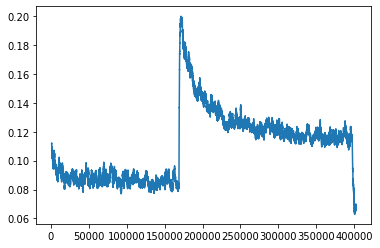

In [955]:
pd.Series(losses).ewm(1000).mean()[1000:].plot();

In [943]:
if len(losses) > 395000:
    share_real = 0.3
    share_noiser = 0.5
    p_keep = 0.5

    optimizer.param_groups[0]['lr'] = 1e-5 

    
model.train()

for _ in trange(5000):
    r = random.random()
    if r < share_real:
        batch = df_orig_train.sample(batch_size)
        xx, yy = batch.trash2.tolist(), batch.clean2.tolist()
    elif r < share_real + share_noiser:
        yy = random.sample(cs2, batch_size)
        xx = [noiser.add_noise(text, edit_rate=0.05) if random.random() > p_keep else text for text in yy]
    else:
        yy = random.sample(cs2, batch_size)
        xx = [add_simple_noise(text, all_chars, edit_rate=0.05) if random.random() > p_keep else text for text in yy]

    bx = tokenizer(xx, return_tensors='pt', padding=True, truncation=True)
    
    labels1 = bx.input_ids * 0 - 100
    labels2 = bx.input_ids * 0 - 100

    for i, (xxx, yyy) in enumerate(zip(xx, yy)):
        src_chars, raw_labels = prl.parallelize(xxx, yyy)
        id_labels1, id_labels2 = prl.labels_to_ids(raw_labels)
        labels1[i, :len(id_labels1)] = torch.tensor(id_labels1[:labels1.shape[1]])
        labels2[i, :len(id_labels2)] = torch.tensor(id_labels2[:labels1.shape[1]])
    
    n1, n2 =  len(prl.labels_this), len(prl.labels_next)
    
    try:
        out = model(**bx.to(model.device))
        loss1 = loss_fn(out.logits[:, :, :n1].view(-1, n1), labels1.to(model.device).view(-1))
        loss2 = loss_fn(out.logits[:, :, n1:].view(-1, n2), labels2.to(model.device).view(-1))
        loss = loss1 + loss2
        loss.backward()
        losses.append(loss.item())
    
        optimizer.step()
        optimizer.zero_grad()
    except RuntimeError as e:
        optimizer.zero_grad(set_to_none=True)
        out, loss, loss1, loss2 = None, None, None, None
        cleanup()
    
    if _ % report_steps == 0:
        print('step', _, 'loss', np.mean(losses[-report_steps:]))

  0%|          | 0/5000 [00:00<?, ?it/s]

step 0 loss 0.11213997058360838
step 1000 loss 0.0706805365961045
step 2000 loss 0.07178925162740052
step 3000 loss 0.05793624343490228
step 4000 loss 0.06614953479799442


In [944]:
model.eval();
dev_small['fixed'] = [fix_text(text) for text in tqdm(dev_small.trash2)]
dev_small['change_amount'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.trash2, row.fixed), axis=1)
dev_small['new_diff'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.clean2, row.fixed), axis=1)

print('reduction', 1 - dev_small.new_diff.sum() / dev_small.distance.sum())

  0%|          | 0/100 [00:00<?, ?it/s]

reduction 0.4883720930232558


In [934]:
print('extra diff', (dev_small.new_diff.sum() +  dev_small.change_amount.sum()) / dev_small.distance.sum() -1)

extra diff 0.17829457364341095


In [935]:
dev_small.mean()

distance               1.2900
normalized_distance    0.0175
edit_max_cldiff        0.4600
edit_max_lendiff       0.0300
change_amount          0.8800
new_diff               0.6400
dtype: float64

In [936]:
dev_small.describe()

,distance,normalized_distance,edit_max_cldiff,edit_max_lendiff,change_amount,new_diff
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.290000,0.017500,0.460000,0.030000,0.880000,0.640000
std,1.157278,0.015884,0.558135,0.171447,1.094338,0.882146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.006332,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.013611,0.000000,0.000000,1.000000,0.000000
75%,2.000000,0.026316,1.000000,0.000000,1.000000,1.000000
max,6.000000,0.062500,2.000000,1.000000,6.000000,4.000000


In [938]:
full_labels = ['THIS_' + t for t in prl.labels_this] + ['NEXT_' + t for t in prl.labels_next]
model.config.label2id = {k: i for i, k in enumerate(full_labels)}
model.config.id2label = {i:k for i, k in enumerate(full_labels)}

* After 160000 steps, I saved the model; it achieved 0.5116 reduction. But it turned out that in self-supervised texts, I erroneously swapped x and y, so I had to redo the whole process. 

In [939]:
# new_model_name = '../models/canine-c-bak-semisupervised' # 160000
new_model_name = '../models/canine-c-bak-semisupervised-v1-1' # 397477
model.save_pretrained(new_model_name)
tokenizer.save_pretrained(new_model_name)

Configuration saved in ../models/canine-c-bak-semisupervised-v1-1\config.json
Model weights saved in ../models/canine-c-bak-semisupervised-v1-1\pytorch_model.bin
tokenizer config file saved in ../models/canine-c-bak-semisupervised-v1-1\tokenizer_config.json
Special tokens file saved in ../models/canine-c-bak-semisupervised-v1-1\special_tokens_map.json


('../models/canine-c-bak-semisupervised-v1-1\\tokenizer_config.json',
 '../models/canine-c-bak-semisupervised-v1-1\\special_tokens_map.json',
 '../models/canine-c-bak-semisupervised-v1-1\\added_tokens.json')